In [1]:
pip install bifold

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


density/interaction               L          norm        renorm      vol2        vol4            msr
──────────────────────────────────────────────────────────────────────────────────────────────────────────────
───────total     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_bdm3y1_paris_fr      0          None        1.000   -37418.526  -694385.823       18.557 
───────direct    - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_bdm3y1_paris_d       0          None        1.000    13076.532    87955.189        6.726     c = 1.252    alpha = 0.000     beta = 0.000    gamma = 1.745        n = 1.000       gE = 0.894    
───────part1     - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
u_R      : u_direct               0          None        1.000    20940.648   104836.120        5.006 
rho_p    : f_2prm_gaussian        0      

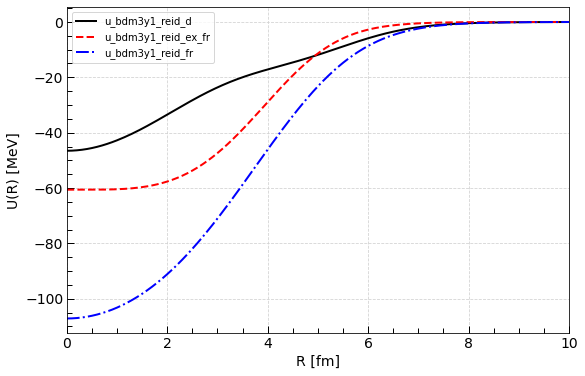

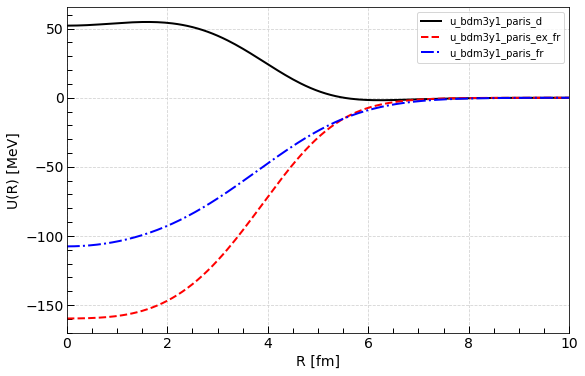

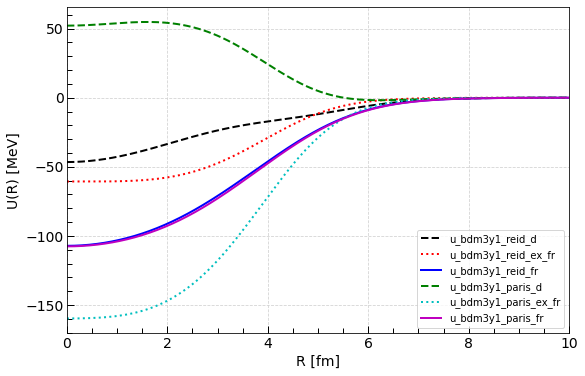

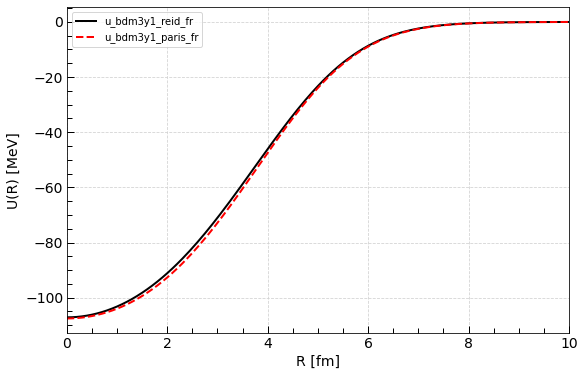

In [2]:
from bifold import *

e_lab = 141.7
z_proj, a_proj =  2,  4
z_targ, a_targ = 20, 40

r = mesh(zero, 10, 0.05)  # fm
q = mesh(zero,  3, 0.05)  # fm^-1
R = r.copy()
s = r.copy()

rho_p = f_2prm_gaussian(r, 0.4229, (1/0.7024)**.5)
rho_t = f_2prm_fermi(r, 0.169, 3.60, 0.523)

rc = 1.2 * (power(a_proj, 1 / 3) + power(a_targ, 1 / 3))
u_coul = u_coul_ucs(R, rc, z_proj, z_targ)

u_paris = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='bdm3y1', vnn_name='paris')

u_reid = u_xdm3yn_fr(e_lab, a_proj, a_targ, rho_p, rho_t, u_coul,
                  r, q, R, s, Cs=1/4, dd_name='bdm3y1', vnn_name='reid')

print_all(u_paris, r, q, R, s)
print_all(u_reid, r, q, R, s)

plot_potentials(u_reid, R, part='all', block=False)
plot_potentials(u_paris, R, part='all', block=False)
plot_potentials([u_reid, u_paris], R, part='all', block=False,
                linestyles=['dashed', 'dotted', 'solid', 'dashed', 'dotted', 'solid'])
plot_potentials([u_reid, u_paris], R)